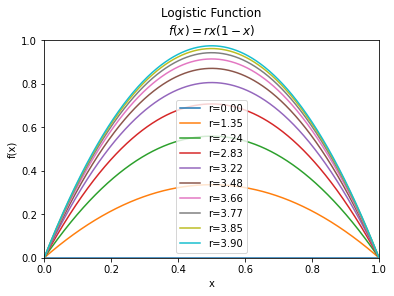

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Logistic function implementation
def logistic_fn(r):
    fn = lambda x: r*x*(1-x)
    fn.__str__ = lambda: "$f(x) = %.2f x(1-x)$" % r

    class FN:
        def __call__(self, x):
            return fn(x)
        def __str__(self):
            return fn.__str__()
        def __repr__(self) -> str:
            return fn.__str__()

    return FN()



# Show the logistic function
xs = np.linspace(0, 1, 1000)
rs = (4 - np.geomspace(0.1, 4, 10))[::-1]
fs = [logistic_fn(r) for r in rs]
for k in range(10):
    plt.plot(xs, fs[k](xs), label="r={0:.2f}".format(rs[k]))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Logistic Function\n$f(x) = rx(1-x)$")
plt.legend()
plt.show()




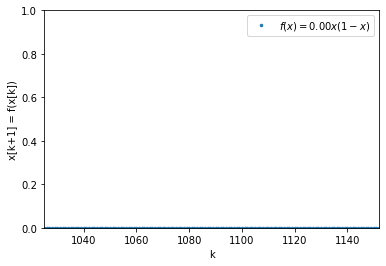

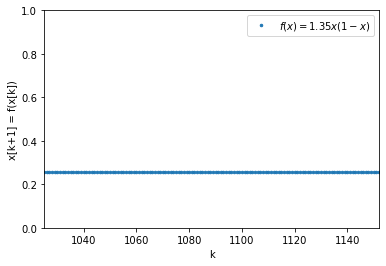

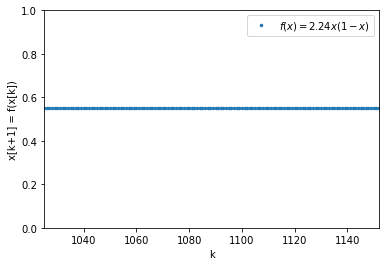

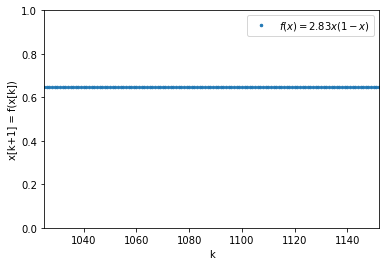

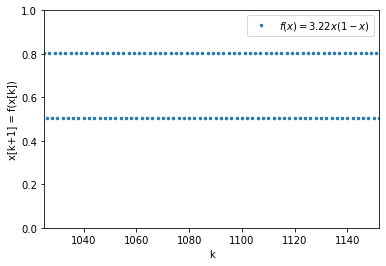

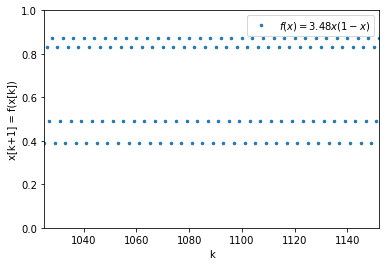

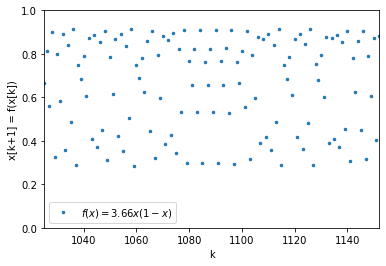

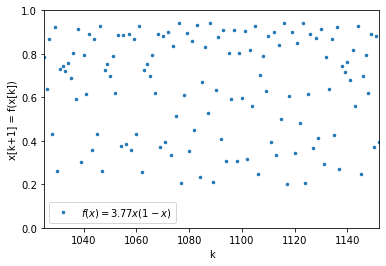

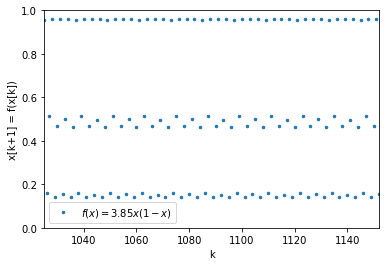

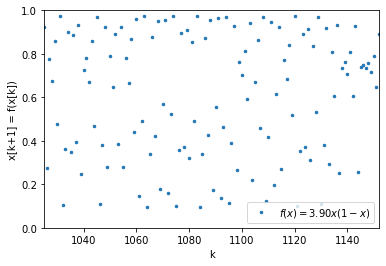

In [21]:
def logistic_fn_expansion(f, x0 = 0.1, items= 2**7, discard = 2**10):
    
    ys = [x0]
    for k in range(items + discard):
        x = f(ys[-1])
        if k > discard:
            ys.append(x)
        else:
            ys = [x]
    return (np.arange(discard+ 1, discard + items + 1),np.array(ys) )

def plot_logistic_expansion(f, items= 2**7, discard = 2**10):
    (xs, ys) = logistic_fn_expansion(f, items=items, discard=discard)
    plt.plot(xs, ys, '.', label=str(f), ms=5)
    plt.ylim(0, 1)
    plt.xlim(xs[0], xs[-1])
    plt.xlabel('k')
    plt.ylabel('x[k+1] = f(x[k])'.format(str(f)))
    plt.legend()
    plt.show()

for fn in fs:
    plot_logistic_expansion(fn)


 

Ranging over 0.0 to 4.0. step size:8500 


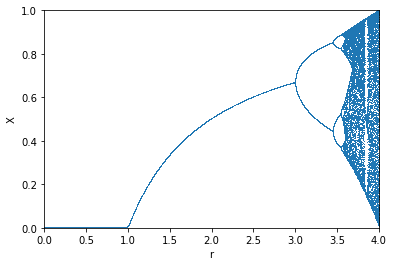

Ranging over 1.3450684675197713 to 4.0. step size:8500 


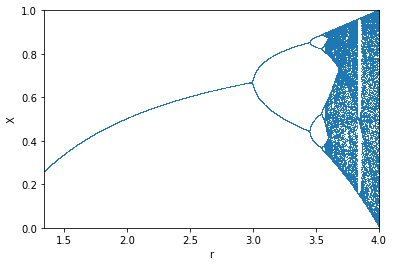

Ranging over 2.237834639460546 to 4.0. step size:8500 


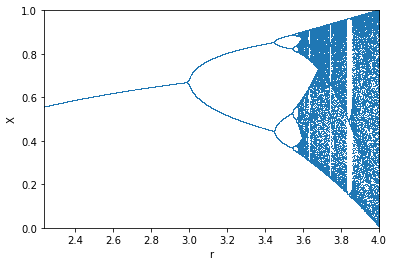

Ranging over 2.8303929047148535 to 4.0. step size:8500 


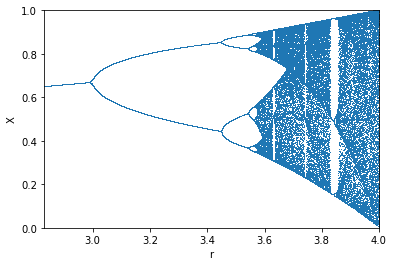

Ranging over 3.223693310528714 to 4.0. step size:8500 


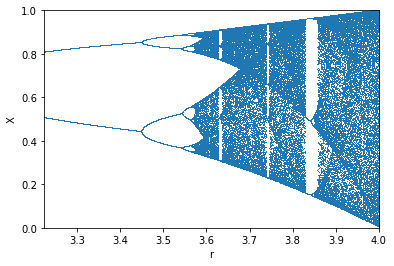

Ranging over 3.4847397228118364 to 4.0. step size:8500 


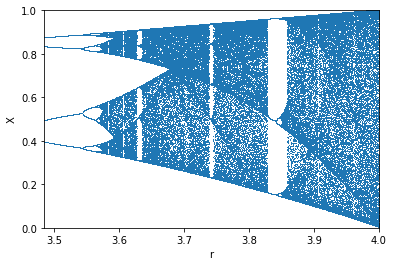

Ranging over 3.6580048106646608 to 4.0. step size:8500 


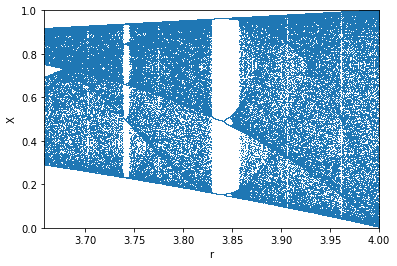

Ranging over 3.7730065469692655 to 4.0. step size:8500 


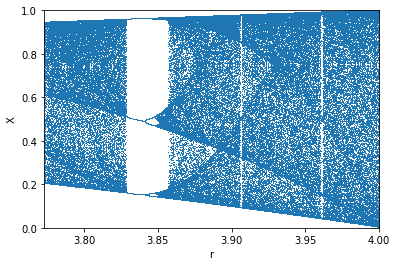

Ranging over 3.8493369809705333 to 4.0. step size:8500 


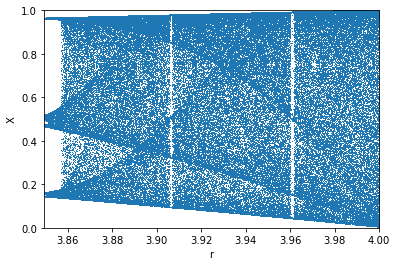

Ranging over 3.9 to 4.0. step size:8500 


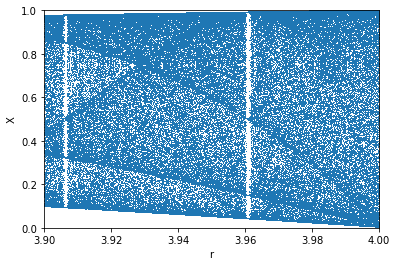

In [23]:
r_max = 4.0
def bifurcation_diagram(r_min = 0 , points=8500, x0=0.2, items=16, discard=256):
    print("Ranging over {1} to {2}. step size:{0} ".format(points, r_min, r_max));
    # Array of r values, the x axis of the bifurcation plot
    R = np.ndarray((points, items))
    # Array of x_t values, the y axis of the bifurcation plot
    X = np.ndarray((points, items))
    
    # Create the r values to loop. For each r value we will plot n_iter points
    r_range = np.linspace(r_min, r_max, points)

    for i in range(points):
        fn = logistic_fn(r_range[i])
        (_, ys) = logistic_fn_expansion(fn, items=items, discard=discard, x0=x0)
        R[i,:] = r_range[i]
        X[i,:] = ys

    R = R.reshape(points * items)
    X = X.reshape(points * items)
    # Plot the data
    plt.plot(R, X, ls='', marker=',', ms=10)
    plt.ylim(0, 1)
    plt.xlim(r_min, r_max)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()

for r in rs:
    bifurcation_diagram(r_min = r)